# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Martha, Mwaura**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


For purposes of **data manipulation and analysis**, we will import the following packages and/or libraries:
- `pandas` : It offers data structures and operations for manipulating numerical tables and time series.
- `numpy` : It's the core library for scientific computing in Python.
- `matplotlib` : It is a library for data visualization.
- `seaborn` : It is an alternative library for data visualization.

For purposes of **data preprocessing and model building**, we will import the following packages and/or libraries:
- `sklearn` : It is a library that contains efficient tools for machine learning and statistical modeling.
- `re` : It is a module with functions that let you check if a particular string matches a given regular expression.
- `scipy` : It is a library used for scientific and technical computing.

In [1]:
# Libraries for data loading, data manipulation and data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We will load the `df_train` file as a Pandas DataFrame for use in the training and evaluation of the model, and `df_test` to generate our target variable.

In [2]:
# Loading df_train.csv
df = pd.read_csv('Advanced-Regression-Starter-Data/df_train.csv')

# Loading df_test.csv
df_test = pd.read_csv('Advanced-Regression-Starter-Data/df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will **start by performing basic analysis** which will entail:
- Looking at the sample of the data
- Finding out the number of rows and columns (plus their respective data types) in the dataset
- Viewing summary statistics for numerical columns
- Checking for null values

We will then perform **univariate analysis** of our target variable `load_shortfall_3h` which will entail:
- Looking at its measures of central tendency and other descriptive summary statistics
- Looking at its distribution including its skewness and outliers
- Looking at its relationship with other features

### 3.1 Basic Analysis

Looking at a sample of the dataset:

In [3]:
# Look at a sample from the top of the dataset
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# Look at a sample from the bottom of the dataset
df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


Since only 20 of the 49 columns have been displayed, we shall use `df.column` to view the names of all columns in order to confirm that the data matches [its description](https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2022/data).

In [5]:
# List of columns
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

From the list of columns and the sample data above, we confirm that our dataframe has the weather data for the Spain cities: Madrid, Valencia, Bilbao, Seville, and Barcelona.

Next, we will check at the number of records in our dataset.

In [6]:
# Check at the number of records
df.shape

(8763, 49)

Our dataset has a total of **8,763 rows** and **49 columns**. This differs slightly with the given description which totals to 48 columns. The difference is due to the `Unnamed: 0` column which matches the rows index.

The next step is to confirm the datatypes of the respective columns which will guide our feature engineering.

In [7]:
# Confirm column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

All columns are of `float` datatype except columns:
- Unnamed: 0
- time
- Valencia_wind_deg
- Seville_pressure

We are also interested in columns with null values.

In [8]:
# Check for nulls
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Only the column `Valencia_pressure` contains null values.

As a last step in the basic analysis, we will generate the summary statistics for the numerical columns.

In [9]:
# look at data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


### 3.2 Univariate Analysis

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 4.1 Base Model Data Engineering

For purposes of the creating the base model, we will drop all non-numeric columns and columns with null values.

As outlined in section 3.1, the non-numeric columns are:
- time
- Valencia_wind_deg
- Seville_pressure

The column that contains null values is:
- Valencia_pressure

We will create a `drop_columns` function that will facilitate this process.

In [10]:
# Function to drop non-numeric columns and columns with null values
def drop_columns(input_df):
    output_df = input_df.copy()
    for column in output_df:
        with_nulls = output_df[column].isna().sum()
        if with_nulls > 0:
            output_df = output_df.drop(column, axis = 1)
        else:
            if column not in df.select_dtypes(include='number').columns:
                output_df = output_df.drop(column, axis = 1)
    return output_df

We will call our function on our training and test datasets.

In [11]:
# The new training dataset
clean_df = drop_columns(df)

In [12]:
# The new test dataset
clean_df_test = drop_columns(df_test)

### 4.2 Comprehensive Data Engineering

From our findings in the Exploratory Data Analysis phase, the columns that require engineering are:
- `Unnamed: 0` : It is redundant
- `time` : Convert it to datetime type
- `Valencia_wind_deg` : Convert it to numeric type
- `Seville_pressure` : Convert it to numeric type
- `Valencia_pressure` : It has null values

#### Unnamed: 0
The column `Unnamed:0` is redundant because its values correspond to the rows index values. 

In [6]:
# Confirm redundancy

df['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

We will drop the column using a `drop_unnamed` function.

In [7]:
# Function to drop "Unnamed: 0" column

def drop_unnamed(input_df):
    output_df = input_df.copy()
    output_df = output_df.drop(['Unnamed: 0'], axis = 1)
    return output_df

Drop the column in both the training and testing datasets.

In [8]:
# Drop "Unnamed: 0" in training dataset

df_train_no_unnamed = drop_unnamed(df)
df_train_no_unnamed.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [9]:
# Drop "Unnamed: 0" in testing dataset

df_test_no_unnamed = drop_unnamed(df_test)
df_test_no_unnamed.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


#### time

`time` column is currently a string, that is, object type. We will convert it to the datetime format, then create 3 new columns from it namely: `hour`, `month` and `year`. We chose to extract hour because the data is periodic, that is, every 3 hours. The month will help in capturing the seasonal changes, and the year will reflect the changes over the years. We will then drop the time column, and we will do this using function `process_date`.

In [10]:
# Function to process date

def process_date(input_df):
    output_df = input_df.copy()
    output_df['time'] = pd.to_datetime(output_df['time'])
    output_df['hour'] = output_df['time'].dt.hour
    output_df['month'] = output_df['time'].dt.month
    output_df['year'] = output_df['time'].dt.year
    output_df = output_df.drop(['time'], axis = 1)
    return output_df    

Process the dates in both the training and testing datasets.

In [11]:
# Process date in training dataset

df_train_date_processed = process_date(df_train_no_unnamed)
df_train_date_processed.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,hour,month,year
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3,1,2015
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6,1,2015


In [12]:
# Process date in testing dataset

df_test_date_processed = process_date(df_test_no_unnamed)
df_test_date_processed.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,hour,month,year
0,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,...,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15,0,1,2018
1,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,...,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15,3,1,2018


#### Valencia_wind_deg

We will start by comparing the values of `Valencia_wind_deg` column with the values of other cities wind degree columns.

In [13]:
# Comparing {city}_wind_deg columns

df_train_wind_deg = df_train_date_processed[['Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg']]
df_train_wind_deg.head()

,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
0,level_5,223.333333,42.666667
1,level_10,221.000000,139.000000
2,level_9,214.333333,326.000000
3,level_8,199.666667,273.000000
4,level_7,185.000000,260.000000


From the above results, `Valencia_wind_deg` has been expressed as categorically whereas `Bilbao_wind_deg` and `Barcelona_wind_deg` are actual values.

We will change `Valencia_wind_deg` into a numeric column by extracting its level number.

In modeling, we will standardize the `{city}_wind_deg` values to ensure the columns have corresponding weight on the model.

In [14]:
# Function to extract level number

def wind_deg_level(input_df):
    output_df = input_df.copy()
    for index, row in output_df.iterrows():
        wind_deg = row['Valencia_wind_deg']
        level = re.sub(r'\D', '', wind_deg)
        output_df.at[index, 'Valencia_wind_deg'] = level
    output_df['Valencia_wind_deg'] = pd.to_numeric(output_df['Valencia_wind_deg'])
    return output_df

Update `Valencia_wind_deg` values.

In [15]:
# Update in the train set

df_train_Valencia_wind_updated = wind_deg_level(df_train_date_processed)
df_train_Valencia_wind_updated.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,hour,month,year
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3,1,2015
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6,1,2015


In [16]:
# Update in the test set

df_test_Valencia_wind_updated = wind_deg_level(df_test_date_processed)
df_test_Valencia_wind_updated.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,hour,month,year
0,5.000000,8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,...,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15,0,1,2018
1,4.666667,8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,...,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15,3,1,2018


#### Seville_pressure

We will start by comparing the values of `Seville_pressure` column with the values of other cities pressure columns.

In [17]:
# Comparing {city}_pressure columns

df_train_pressure = df_train_Valencia_wind_updated[['Seville_pressure', 'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure']]
df_train_pressure.head()

,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
0,sp25,1036.333333,1035.000000,1002.666667,971.333333
1,sp25,1037.333333,1035.666667,1004.333333,972.666667
2,sp25,1038.000000,1036.000000,1005.333333,974.000000
3,sp25,1037.000000,1036.000000,1009.000000,994.666667
4,sp25,1035.000000,1035.333333,NaN,1035.333333


From the above results, we can tell that a categorical scale has been used for `Seville_pressure` column, unlike the other columns where the actual values have been used.

We will change `Seville_pressure` into a numeric column by extracting the level number.

In modeling, we will standardize the `{city}_pressure` values to ensure the columns have corresponding weight on the model.

In [18]:
# Function to extract level number

def pressure_level(input_df):
    output_df = input_df.copy()
    for index, row in output_df.iterrows():
        pressure = row['Seville_pressure']
        level = re.sub(r'\D', '', pressure)
        output_df.at[index, 'Seville_pressure'] = int(level)
    output_df['Seville_pressure'] = pd.to_numeric(output_df['Seville_pressure'])
    return output_df

Update `Seville_pressure` values.

In [19]:
# Update in the train set

df_train_Seville_pressure_updated = pressure_level(df_train_Valencia_wind_updated)
df_train_Seville_pressure_updated[['Seville_pressure', 'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure']].head(2)

,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
0,25,1036.333333,1035.000000,1002.666667,971.333333
1,25,1037.333333,1035.666667,1004.333333,972.666667


In [20]:
# Update in the test set

df_test_Seville_pressure_updated = pressure_level(df_test_Valencia_wind_updated)
df_test_Seville_pressure_updated[['Seville_pressure', 'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure']].head(2)

,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
0,25,1017.333333,1025.666667,NaN,1030.000000
1,25,1020.333333,1026.666667,NaN,1030.333333


#### Valencia_pressure

In the Exploratory Data Analysis section, we noted that there were 2,068 missing values in the `Valencia_pressure` column. We first want to know the spread of the missing values.

In [21]:
# Group Valencia_pressure missing values by month and year

df_train_valencia_pressure = df_train_Seville_pressure_updated.copy()
df_valencia_nulls = df_train_valencia_pressure.Valencia_pressure.isnull().groupby([df_train_valencia_pressure['year'],df_train_valencia_pressure['month']]).sum().astype(int).reset_index(name='nulls')
df_valencia_nulls

,year,month,nulls
0,2015,1,87
1,2015,2,57
2,2015,3,93
3,2015,4,85
4,2015,5,0
5,2015,6,2
6,2015,7,6
7,2015,8,0
8,2015,9,14
9,2015,10,2


Since the null values are spread across all the months, we will impute the missing values with the mode based on the `month` and `year` columns.

In [22]:
# Function to perform conditional impute

def fill_pressure_null(input_df):
    output_df = input_df.copy()
    for index, row in output_df.iterrows():
        if(pd.isnull(row['Valencia_pressure'])):
            conditions = list(output_df[['month', 'year']].iloc[index])
            filtered = output_df[(output_df['month'] == conditions[0]) & (output_df['year'] == conditions[1])]
            mode = list(filtered['Valencia_pressure'].mode())
            output_df.at[index, 'Valencia_pressure'] = mode[0]
    return output_df

Fill in the missing values in the train and test datasets.

In [23]:
# Fill in the training set

df_train_no_nulls = fill_pressure_null(df_train_Seville_pressure_updated)
df_train_no_nulls['Valencia_pressure'].head(5)

0    1002.666667
1    1004.333333
2    1005.333333
3    1009.000000
4    1008.000000
Name: Valencia_pressure, dtype: float64

In [24]:
# Fill in the test set

df_test_no_nulls = fill_pressure_null(df_test_Seville_pressure_updated)
df_test_no_nulls['Valencia_pressure'].head(5)

0    1021.333333
1    1021.333333
2    1021.333333
3    1021.333333
4    1021.333333
Name: Valencia_pressure, dtype: float64

#### Confirmation

We now need to confirm that our dataset only contains numeric non-null columns.

In [25]:
# Train set confirmation

df_train_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [26]:
# Test set confirmation

df_test_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     2920 non-null   float64
 1   Valencia_wind_deg     2920 non-null   int64  
 2   Bilbao_rain_1h        2920 non-null   float64
 3   Valencia_wind_speed   2920 non-null   float64
 4   Seville_humidity      2920 non-null   float64
 5   Madrid_humidity       2920 non-null   float64
 6   Bilbao_clouds_all     2920 non-null   float64
 7   Bilbao_wind_speed     2920 non-null   float64
 8   Seville_clouds_all    2920 non-null   float64
 9   Bilbao_wind_deg       2920 non-null   float64
 10  Barcelona_wind_speed  2920 non-null   float64
 11  Barcelona_wind_deg    2920 non-null   float64
 12  Madrid_clouds_all     2920 non-null   float64
 13  Seville_wind_speed    2920 non-null   float64
 14  Barcelona_rain_1h     2920 non-null   float64
 15  Seville_pressure     

#### Variable Selection by Correlation and Significance

Our datasets have a total of 49 predictor variables and we will select those with the strongest correlation to `load_shortfall_3h` target variable. 

We will start by creating a new dataframe and store the correlation coefficients and p-values in that dataframe.

In [54]:
# Calculate correlations between predictor variables and the response variable
corrs = df_train_no_nulls.corr()['load_shortfall_3h'].sort_values(ascending=False)

We will use the Pearson correlation coefficient,_r_, in our analysis. _r_, can take on values between -1 and 1. The further away _r_ is from zero, the stronger the linear relationship between the two variables.

We will also use the p-value to evaluate how significant the variables are.

In [58]:
# Build a dictionary of correlation coefficients and p-values
dict_corr_pval = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_train_no_nulls[col], df_train_no_nulls['load_shortfall_3h'])[1],6)
    dict_corr_pval[col] = {'Correlation_Coefficient':corrs[col],
                           'P_Value':p_val}
    
df_corr_pval = pd.DataFrame(dict_corr_pval).T
df_corr_pval_sorted = df_corr_pval.sort_values('Correlation_Coefficient')
df_corr_pval_sorted[df_corr_pval_sorted['P_Value']<0.05]

,Correlation_Coefficient,P_Value
Valencia_wind_deg,-0.188674,0.000000
Seville_humidity,-0.167290,0.000000
Bilbao_rain_1h,-0.152510,0.000000
Madrid_wind_speed,-0.150981,0.000000
Madrid_humidity,-0.150536,0.000000
Valencia_wind_speed,-0.142791,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Barcelona_wind_speed,-0.103633,0.000000


Using a logical test of a significance value of 5% (p-value < 0.05), all variables are statistically significant. We shall therefore use the correlation coefficient to select our features. Using _r_ <= -0.15 or _r_ >= 0.15, our predictor variables will be:
- Valencia_wind_deg
- Seville_humidity
- Bilbao_rain_1h
- Madrid_wind_speed
- Madrid_humidity
- Seville_temp
- Barcelona_temp_max
- Bilbao_temp_min
- Valencia_temp
- Seville_temp_min
- Madrid_temp_min
- Bilbao_temp
- Bilbao_temp_max
- Madrid_temp_max
- Barcelona_temp
- Madrid_temp
- Barcelona_temp_min
- month
- Valencia_temp_min

We also need to look for the selected predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

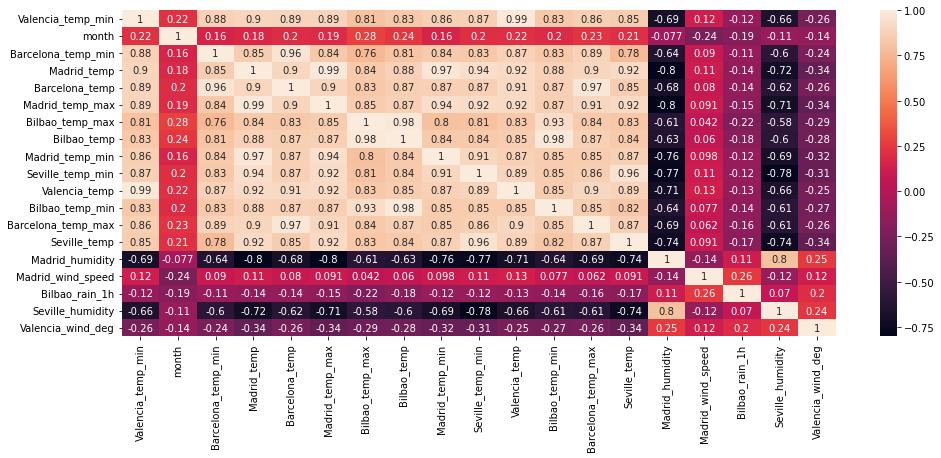

In [75]:
# Create a list of selected predictors
select_predictors = list(df_corr_pval[(df_corr_pval['Correlation_Coefficient'] >= 0.15) | 
                                      (df_corr_pval['Correlation_Coefficient'] <= -0.15)].index)
predictors_data = df_train_no_nulls[select_predictors]

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# plotting correlation heatmap
dataplot = sns.heatmap(predictors_data.corr(), annot=True)
  
# displaying heatmap
plt.show()

Our interest is the variables with a correlation coefficient _r_ >= 0.9 or _r_ <= -0.9. We eliminate the variables are highly correlated, with a lower absolute correlation to our target variable. Using this principle, our final predictors are:

- Valencia_temp_min
- month
- Barcelona_temp_min
- Valencia_wind_deg
- Bilbao_temp_max
- Seville_humidity
- Bilbao_rain_1h
- Madrid_wind_speed
- Madrid_humidity

We will create a function that outputs our final predictors.

In [133]:
# function to filter predictors

def filter_predictors(input_df):
    output_df = input_df.copy()
    predictors = ['Valencia_temp_min', 'month', 'Barcelona_temp_min', 'Valencia_wind_deg', 'Bilbao_temp_max',
                 'Seville_humidity', 'Bilbao_rain_1h', 'Madrid_wind_speed', 'Madrid_humidity']
    if 'load_shortfall_3h' in output_df.columns:
        df_target = output_df['load_shortfall_3h']
        df_predictors = output_df[predictors]
        output_df = pd.concat([df_predictors, df_target], axis = 1)
    else:
        output_df = output_df[predictors]
    return output_df

Filter predictors in the training and testing set

In [134]:
# Filter the training set

df_train_clean = filter_predictors(df_train_no_nulls)
df_train_clean.head(2)

,Valencia_temp_min,month,Barcelona_temp_min,Valencia_wind_deg,Bilbao_temp_max,Seville_humidity,Bilbao_rain_1h,Madrid_wind_speed,Madrid_humidity,load_shortfall_3h
0,269.888000,1,281.013000,5,269.338615,74.333333,0.0,0.666667,64.000000,6715.666667
1,271.728333,1,280.561667,10,270.376000,78.333333,0.0,0.333333,64.666667,4171.666667


In [135]:
# Filter the testing set

df_test_clean = filter_predictors(df_test_no_nulls)
df_test_clean.head(2)

,Valencia_temp_min,month,Barcelona_temp_min,Valencia_wind_deg,Bilbao_temp_max,Seville_humidity,Bilbao_rain_1h,Madrid_wind_speed,Madrid_humidity
0,287.483333,1,286.816667,8,285.15,87.0,0.0,5.000000,71.333333
1,284.150000,1,283.483333,8,284.15,89.0,0.0,4.666667,78.000000


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 5.1 The Base Model - Linear Regression Model

For the base model, we will use the data as is, that is, without preprocessing.

We will start by splitting the dataset into the response, `y`, and features, `X`.

In [13]:
# Create the target and features
y = clean_df['load_shortfall_3h']
X = clean_df.drop('load_shortfall_3h', axis = 1)

Our target, variable we want to predict, is `load_shortfall_3h`, and the predictors, are all the rest of the columns.

We will then proceed to split our dataset using the `train_test_split` for purposes of training the model we will create, and evaluating its performance.

In [14]:
# Split the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

We will use 80% of our dataset for model training purposes, and 20% to validate our model. We have set the random_state value to ensure that the random nature in which rows are picked to be in the validation set is the same each time the split is carried out.

We now proceed in creating our Linear Regression model.

In [15]:
# Declare the model object
lm = LinearRegression()

Our model object has been created. 

We can now fit our model by exposing it to our training data.

In [16]:
# Training the model
lm.fit(X_train, y_train)

LinearRegression()

Having created and trained our model, we proceed to the validation phase, that is, using our 20% reserve data with known target values.

In [17]:
# Make predictions using validation set
validation_preds = lm.predict(X_test)

#### 5.1.1 Evaluate Base Model

We will use the Root Mean Square Error metric to evaluate our model.

In [18]:
#Find the RMSE
rmse = mean_squared_error(y_test, validation_preds, squared = False)

We are aiming for an RMSE value of 3500 or below. Our base model's RMSE is displayed below.

In [19]:
print("Base model RMSE = {}". format(rmse))

Base model RMSE = 4856.6554416172385


#### 5.1.2 Submission From Base Model

We will retrain our model using the combined training and validation datasets, and make predictions for our test set.

In [20]:
# Fit the model using the whole training dataset
lm.fit(X, y)

LinearRegression()

In [21]:
# Make prediction for the target variable
predictions = lm.predict(clean_df_test)

We will store the predictions in a dataframe.

In [26]:
# Store predictions in a dataframe
load_shortfall = pd.DataFrame(predictions, columns = ['load_shortfall_3h'])

# A preview of our dataframe
load_shortfall.head()

,load_shortfall_3h
0,9774.049403
1,9186.230955
2,10194.296086
3,9968.582159
4,9328.980673


The final step is creating the submission csv file in the required format.

In [27]:
# Get Time variable as a dataframe
time = pd.DataFrame({'time': df_test['time']})

# Combine Time DataFrame with the Load_shortfall dataframe
submission = time.join(load_shortfall)

# Write to the result to a csv file
submission.to_csv('submission.csv', index = False)

Save the model

In [23]:
model_path = 'linear_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(lm, file)

### 5.2 Decision Tree Model

We will start by splitting the dataset into the response, `y`, and features, `X`.

In [80]:
# Create the target and features
y = df_train_clean['load_shortfall_3h']
X = df_train_clean.drop('load_shortfall_3h', axis = 1)

We will then scale our features using standardization because it is robust to outliers.

In [81]:
# Initialize scaler objects
x_scaler = StandardScaler()

# Standardize X
X_scaled = x_scaler.fit_transform(X)

# Set test size to 20% of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 6, shuffle = False)

Create and fit the model.

In [82]:
# Instantiate Decision Tree model

decision_tree = DecisionTreeRegressor(max_depth = 3)

In [83]:
# Fit the model

decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

Check the performance of the decision tree.

In [84]:
# Generate predictions using validation set
y_pred = decision_tree.predict(x_test)

In [85]:
#Find the RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("RMSE = {}". format(rmse))

RMSE = 4952.839845014369


### 5.3 Random Forest Model

We will start by splitting the dataset into the response, `y`, and features, `X`.

In [156]:
# Create the target and features
y = df_train_clean['load_shortfall_3h']
X = df_train_clean.drop('load_shortfall_3h', axis = 1)

We will then scale our features using standardization because it is robust to outliers.

In [157]:
# Initialize scaler objects
x_scaler = StandardScaler()

# Standardize X
X_scaled = x_scaler.fit_transform(X)

# Set test size to 20% of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 6, shuffle = False)

Create and fit the model.

In [158]:
# Instantiate Random Forest model

random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state = 42)

In [159]:
# Fit the model

random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

Check the performance of the decision tree.

In [160]:
# Generate predictions using validation set
y_pred = random_forest.predict(x_test)

In [161]:
#Find the RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("RMSE = {}". format(rmse))

RMSE = 4863.360573163984


#### 5.3.1 Submission From Random Forest Model

We will retrain our model using the combined training and validation datasets, and make predictions for our test set.

In [129]:
# Fit the model using the whole training dataset
random_forest.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=42)

In [130]:
# Make prediction for the target variable
predictions = random_forest.predict(df_test_clean)

We will store the predictions in a dataframe.

In [131]:
# Store predictions in a dataframe
load_shortfall = pd.DataFrame(predictions, columns = ['load_shortfall_3h'])

# A preview of our dataframe
load_shortfall.head()

,load_shortfall_3h
0,10082.060091
1,10365.717899
2,11373.469264
3,8877.172585
4,11198.360426


The final step is creating the submission csv file in the required format.

In [132]:
# Get Time variable as a dataframe
time = pd.DataFrame({'time': df_test['time']})

# Combine Time DataFrame with the Load_shortfall dataframe
submission = time.join(load_shortfall)

# Write to the result to a csv file
submission.to_csv('rf_submission.csv', index = False)

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic